**线性模型**的形式为：$$f(\vec{x})=\vec{w}\cdot \vec{x}+b$$

其中，$\vec{w}=(w^{(1)},w^{(2)}, \cdots, w^{(n)})^T$，$\vec{w}$为每个特征对应的权重生成的权重向量。权重向量直观地表达了各个特征在预测中的重要性。

常见的广义线性模型（Generalized Linear Model）：岭回归、lasso回归、Elastic Net、逻辑回归、线性判别分析（Linear Discriminant Analysis，LDA）等。

分类：逻辑回归、线性判别分析。

____
对于给定样本$\vec{x}_i$，其预测值为$\hat{y}_i=f(\vec{x}_i)=\vec{w}\cdot \vec{x}_i+b$。采用平方损失函数，则在训练集T上，模型的损失函数为：
$$L(f)=\sum_{i=1}^N(\hat{y}_i-y_i)^2=\sum_{i=1}^N(\vec{w}\cdot \vec{x}_i+b-y_i)^2$$

目标是损失函数最小化：
$$(\vec{w}^*,b^*)=arg\ \underset{\vec{w},b}{min}\sum_{i=1}^N(\vec{w}\cdot \vec{x}_i+b-y_i)^2$$

使用梯度下降法来求解上述最优化问题时，需注意特征归一化（Feature Scaling）。

特征归一化的好处：
1. 提升模型的收敛速度。
> 如特征$x_1$和$x_2$，$x_1$取值为0~2000，而$x_2$取值为1~5。对其进行优化时，会得到一个窄长的椭圆形，导致在梯度下降时，梯度的方向为垂直等高线的方向而走之字形路线，这样会使迭代很慢。相比之下，归一化之后，是一个圆形，梯度的方向为直接指向圆心，迭代就会很快。
2. 提升模型精度。
> 如算法要计算欧式距离，$x_2$的取值范围比较小，涉及距离计算时其对结果的影响远比$x_1$带来的小，所以这会造成精度的损失。

___
令$h(y)=\vec{w}^T\vec{x}+b$得到的模型称为广义线性模型。

当$h(\cdot)=ln(\cdot)$时的广义线性模型为对数线性回归，即
$$ln\ y=\vec{w}^T\vec{x}+b$$

____
**线性判别分析**：
- 训练时：设法将训练样本投影到一条直线上，使得同类样本的投影点尽可能地接近、异类样本的投影点尽可能的远离。要学习的就是这样的一条直线。
- 预测时：将待预测样本投影到学到的直线上，根据它的投影点的位置来判定它的类别。
> 同类样本的投影点尽可能地接近、异类样本的投影点尽可能地远离。

___
**线性回归模型：sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)**
> 1. fit_intercept：布尔值，指定是否需要计算b值。如果为False，不计算b。
> 2. normalize：布尔值。如果为True，训练样本会在回归之前被归一化。
> 3. copy_X：布尔值。如果为True，则会复制X。
> 4. n_jobs：任务并行时指定的CPU数量。如果为-1则使用所有可用的CPU。

属性：
> 1. coef_：权重向量。
> 2. intercept_：b值。

方法：
> 1. fit(X, y[, sample_weight])：训练模型。
> 2. predict(X)：用模型进行预测，返回预测值。
> 3. score(X, y[, sample_weight])：返回预测性能得分。score越大，预测性能越好。
___

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, discriminant_analysis
from sklearn.model_selection import train_test_split

In [6]:
def load_data():
    """
    return: 返回一个元组，依次为：训练样本集、测试样本集、训练样本集对应的标签值、测试样本集对应的标签值
    """
    diabetes = datasets.load_diabetes()
    return train_test_split(diabetes.data, diabetes.target, test_size=0.25, random_state=0)

In [10]:
def test_LinearRegression(*data):
    X_train, X_test, y_train, y_test = data
    regr = linear_model.LinearRegression()
    regr.fit(X_train, y_train)
    print('Coefficients:%s, intercept:%.2f' % (regr.coef_, regr.intercept_))
    print("Residual sum of squares: %.2f" % (np.mean((regr.predict(X_test) - y_test) ** 2)))
    print('Score: %.2f' % regr.score(X_test, y_test))
    
X_train, X_test, y_train, y_test = load_data()
test_LinearRegression(X_train, X_test, y_train, y_test)

Coefficients:[ -43.26774487 -208.67053951  593.39797213  302.89814903 -560.27689824
  261.47657106   -8.83343952  135.93715156  703.22658427   28.34844354], intercept:153.07
Residual sum of squares: 3180.20
Score: 0.36


____
**正则化**：对模型的参数添加一些先验假设，控制模型空间，以达到使得模型复杂度较小的目的。岭回归和Lasso是目前最为流行的两种线性回归正则化方法。
- 岭回归（Ridge Regression）：正则化项为$\alpha ||\vec{w}||^2_2, \alpha \geq 0$
- Lasso Regression：正则化项为$\alpha ||\vec{w}||_1, \alpha \geq 0$
- Elastic Net：正则化项为$\alpha \rho ||\vec{w}||_1 +\frac{\alpha (1-\rho)}{2}||\vec{w}||^2_2,\alpha \geq 0, 1 \geq \rho \geq 0$
其中，$\rho$影响的是性能下降的速度。

**岭回归**：在损失函数中加入L2范数惩罚项，来控制线性模型的复杂程度，从而使得模型更稳健。

**sklearn.linear_model.Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='auto', random_state=None)**
> 1. alpha：其值越大，正则化项的占比越大。
> 2. max_iter：整数，最大迭代次数。
> 3. tol：浮点数，指定判断迭代收敛与否的阈值。
> 4. solver：字符串，指定求解最优化问题的算法。
    - auto：根据数据集自动选择算法。
    - svd：使用奇异值分解来计算回归系数。
    - cholesky：使用scipy.linalg.solve函数来求解。
    - sparse_cg：使用scipy.sparse.linalg.cg函数来求解。
    - lsqr：使用scipy.sparse.linalg.lsqr函数来求解，运算速度最快。
    - sag：使用Stochastic Average Gradient Descent算法求解。
> 5. random_state：在solver=sag时使用。

属性：
> 1. coef_：权重向量。
> 2. intercept_：b值。
> 3. n_iter_：实际迭代次数。

方法：
> 1. fit(X, y[, sample_weight])：训练模型。
> 2. predict(X)
> 3. score(X, y[, sample_weight])

In [16]:
def test_Ridge(*data):
    X_train, X_test, y_train, y_test = data
    regr = linear_model.Ridge()
    regr.fit(X_train, y_train)
    print('Coefficients: %s, intercept: %.2f' % (regr.coef_, regr.intercept_))
    print("Residual sum of squares: %.2f" % np.mean((regr.predict(X_test) - y_test) ** 2))
    print('Score: %.2f' % regr.score(X_test, y_test))
    
X_train, X_test, y_train, y_test = load_data()
test_Ridge(X_train, X_test, y_train, y_test)

Coefficients: [  21.19927911  -60.47711393  302.87575204  179.41206395    8.90911449
  -28.8080548  -149.30722541  112.67185758  250.53760873   99.57749017], intercept: 152.45
Residual sum of squares: 3192.33
Score: 0.36


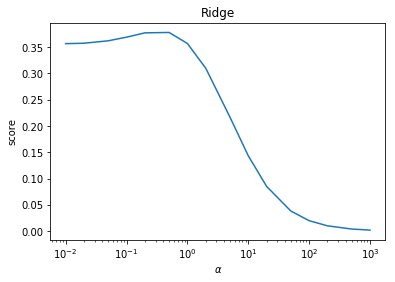

In [19]:
def test_Ridge_alpha(*data):
    X_train, X_test, y_train, y_test = data
    alphas = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
    scores = []
    for alpha in alphas:
        regr = linear_model.Ridge(alpha=alpha)
        regr.fit(X_train, y_train)
        scores.append(regr.score(X_test, y_test))
        
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(alphas, scores)
    ax.set_xlabel(r"$\alpha$")
    ax.set_ylabel(r"score")
    ax.set_xscale('log')  # 将x轴设置为对数坐标
    ax.set_title('Ridge')
    plt.show()

X_train, X_test, y_train, y_test = load_data()
test_Ridge_alpha(X_train, X_test, y_train, y_test)

- 当$\alpha$超过1之后，随着$\alpha$的增长，预测性能急剧下降。这是因为$\alpha$较大时，正则化项$\alpha ||\vec{w}||^2_2$影响较大，模型趋向于简单。

_____
**Lassi回归**：**sklearn.linear_model.Lasso(alpha=1.0, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')**
> 1. precompute：布尔值或一个序列。决定是否提前计算Gram矩阵来加速计算。
> 2. warm_start：布尔值。如果为Trye，则使用前一次训练结果继续训练，否则从头开始训练。
> 3. positive：布尔值。如果为True，强制要求权重向量的分量都为正数。
> 4. selection：字符串。指定了当每轮迭代的时候，选择权重向量的哪个分量来更新。
    - random：更新的时候，随机选择权重向量的一个分量来更新。
    - cyclic：更新的时候，从前向后依次选择权重向量的一个分量来更新。
    
属性：
> 1. coef_：权重向量。
> 2. intercept_：b值。
> 3. n_iter_：实际迭代次数。

方法：
> 1. fit(X, y[, sample_weight])：训练模型。
> 2. predict(X)
> 3. score(X, y[, sample_weight])

In [20]:
def test_Lasso(*data):
    X_train, X_test, y_train, y_test = data
    regr = linear_model.Lasso()
    regr.fit(X_train, y_train)
    print('Coefficients: %s, intercept: %.2f' % (regr.coef_, regr.intercept_))
    print("Residual sum of squares: %.2f" % np.mean((regr.predict(X_test) - y_test) ** 2))
    print('Score: %.2f' % regr.score(X_test, y_test))
    
X_train, X_test, y_train, y_test = load_data()
test_Lasso(X_train, X_test, y_train, y_test)

Coefficients: [  0.          -0.         442.67992538   0.           0.
   0.          -0.           0.         330.76014648   0.        ], intercept: 152.52
Residual sum of squares: 3583.42
Score: 0.28


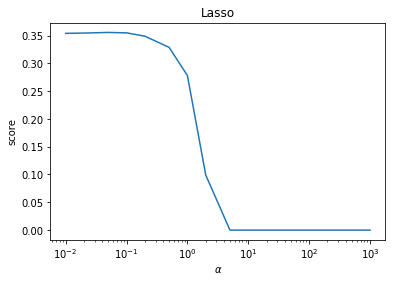

In [21]:
def test_Lasso_alpha(*data):
    X_train, X_test, y_train, y_test = data
    alphas = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
    scores = []
    for alpha in alphas:
        regr = linear_model.Lasso(alpha=alpha)
        regr.fit(X_train, y_train)
        scores.append(regr.score(X_test, y_test))
        
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(alphas, scores)
    ax.set_xlabel(r"$\alpha$")
    ax.set_ylabel(r"score")
    ax.set_xscale('log')  # 将x轴设置为对数坐标
    ax.set_title('Lasso')
    plt.show()

X_train, X_test, y_train, y_test = load_data()
test_Lasso_alpha(X_train, X_test, y_train, y_test)

____
**ElasticNet回归**：**sklearn.linear_model.ElasticNet(alpha=1.0, l1_ratio=0.5, fit_intercept=True, normalize=False, precompute=False, max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')**
> 1. l1_ratio：$\rho$值。

In [22]:
def test_ElasticNet(*data):
    X_train, X_test, y_train, y_test = data
    regr = linear_model.ElasticNet()
    regr.fit(X_train, y_train)
    print('Coefficients: %s, intercept: %.2f' % (regr.coef_, regr.intercept_))
    print("Residual sum of squares: %.2f" % np.mean((regr.predict(X_test) - y_test) ** 2))
    print('Score: %.2f' % regr.score(X_test, y_test))
    
X_train, X_test, y_train, y_test = load_data()
test_ElasticNet(X_train, X_test, y_train, y_test)

Coefficients: [ 0.40560736  0.          3.76542456  2.38531508  0.58677945  0.22891647
 -2.15858149  2.33867566  3.49846121  1.98299707], intercept: 151.93
Residual sum of squares: 4922.36
Score: 0.01


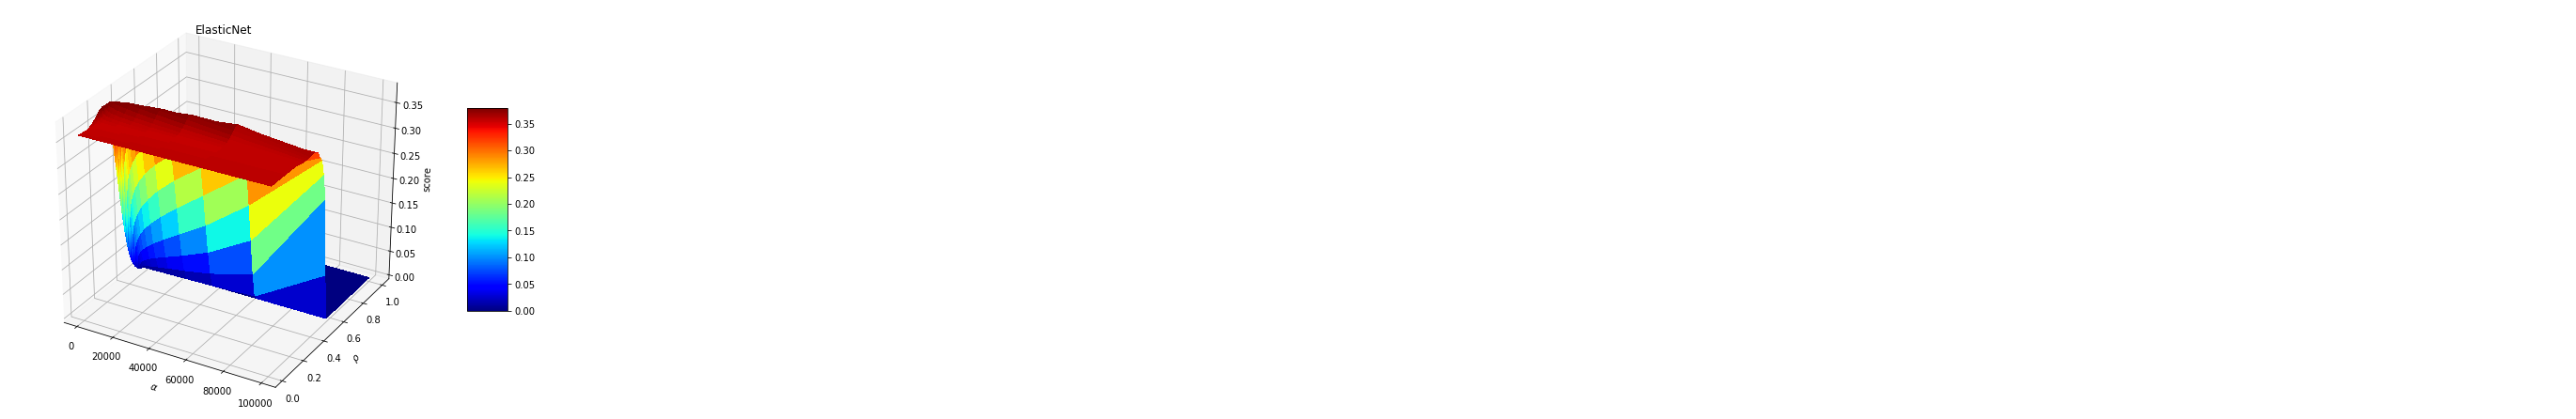

In [28]:
def test_ElasticNet_alpha_rho(*data):
    X_train, X_test, y_train, y_test = data
    alphas = np.logspace(-5, 5)
    rhos = np.linspace(0.01, 1)
    scores = []
    for alpha in alphas:
        for rho in rhos:
            regr = linear_model.ElasticNet(alpha=alpha, l1_ratio=rho)
            regr.fit(X_train, y_train)
            scores.append(regr.score(X_test, y_test))
        
    alphas, rhos = np.meshgrid(alphas, rhos)
    scores = np.array(scores).reshape(alphas.shape)
    from mpl_toolkits.mplot3d import Axes3D
    from matplotlib import cm
    fig = plt.figure(figsize=(8,6))
    ax = Axes3D(fig)
    surf = ax.plot_surface(alphas, rhos, scores, rstride=1, cstride=1, cmap=cm.jet, linewidth=0, antialiased=False)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    ax.set_xlabel(r"$\alpha$")
    ax.set_ylabel(r"$\rho$")
    ax.set_zlabel("score")
    ax.set_title('ElasticNet')
    plt.show()

X_train, X_test, y_train, y_test = load_data()
test_ElasticNet_alpha_rho(X_train, X_test, y_train, y_test)

____
**逻辑回归**：**sklearn.linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='warn', max_iter=100, multi_class='warn', verbose=0, warm_start=False, n_jobs=None)**
> 1. penalty：字符串，指定正则化策略。
> 2. dual：布尔值。如果为True，求解对偶形式，只在penalty=l2，且solver=liblinear有对偶形式。
> 3. C：浮点数，指定惩罚项系数的倒数。其值越小，正则化项越大。
    - 随着C的增大，LogisticRegression的预测准确率上升。当C增大到一定程度时，其预测准确率维持在较高的水准保持不变。
> 4. intercept_scaling：浮点数。只有当solver=liblinear才有意义。当采用fit_intercept时，相当于人造一个特征出来，该特征恒为1，其权重为b。在计算正则化项的时候，该人造特征也被考虑了。为了降低其影响，需提供intercept_scaling。
> 5. class_weight：字典或字符串balanced。
    - 若为字典，需给出每个分类的权重。
    - 若为字符串balanced，则每个分类的权重与该分类在样本集中出现的频率成反比。
    - 若为None，则每个分类的权重都为1。
> 6. solver：字符串，指定求解最优化问题的算法。
    - newton-cg：牛顿法。
    - lbfgs：L-BFGS拟牛顿法。
    - liblinear
    - sag
    - liblinear适用于规模小的数据集，sag适用于规模大的数据集。
    - netton-cg、lbfgs、sag只处理penalty=l2的情况。
> 7. multi_class：字符串，指定用于多分类问题的策略。
    - ovr：默认值，采用one-vs-rest策略。
    - multinomial：直接采用多分类逻辑回归策略。此时solver需为newton-cg、或lbfgs。
> 8. verbose：整数。用于开启/关闭迭代中间输出日志功能。

属性：
> 1. coef_：权重向量。
> 2. intercept_：b值。
> 3. n_iter_：实际迭代次数。

方法：
> 1. fit(X, y[, sample_weight])：训练模型。
> 2. predict(X)
> 3. predict_log_proba(x)：返回一个数组，数组元素依次为x预测为各个类别的概率的对数值。
> 4. predict_proba(x)：返回一个数组，数组元素依次为x预测为各个类别的概率值。
> 5. score(X, y[, sample_weight])：预测准确率。

In [33]:
def load_iris_data():
    iris = datasets.load_iris()
    X_train = iris.data
    y_train = iris.target
    return train_test_split(X_train, y_train, test_size=0.25, random_state=0, stratify=y_train) # 分层抽样

In [39]:
def test_LogisticRegression(*data):
    """
    使用逻辑回归模型，对鸢尾花进行分类
    """
    X_train, X_test, y_train, y_test = data
    regr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg')
    regr.fit(X_train, y_train)
    print('Coefficients: %s, intercept: %s' % (regr.coef_, regr.intercept_))
    print('Score: %.2f' % regr.score(X_test, y_test))
    
X_train, X_test, y_train, y_test = load_iris_data()
test_LogisticRegression(X_train, X_test, y_train, y_test)

Coefficients: [[-0.38340951  0.8619554  -2.26980072 -0.97519142]
 [ 0.34371696 -0.37875016 -0.03130716 -0.86814284]
 [ 0.03969255 -0.48320525  2.30110788  1.84333426]], intercept: [  8.75832145   2.49385093 -11.25217238]
Score: 1.00


_____
**线性判别分析**：**sklearn.discriminant_analysis.LinearDiscriminantAnalysis(solver='svd', shrinkage=None, priors=None, n_components=None, store_covariance=False, tol=0.0001)**
> 1. solver：字符串。
    - svd：奇异值分解。推荐有大规模的数据使用。
    - lsqr：最小平方差算法，可结合shrinkage参数。
    - eigen：特征值分解算法，可结合shrinkage参数。
> 2. shrinkage：字符串、浮点数或None。通常在训练样本量小于特征数量的场合下使用。
    - auto：根据Ledoit-Wolf引理来自动决定shrinkage参数的大小。
    - None：不使用。
    - 浮点数，介于0~1之间。
> 3. priors：数组，其元素依次指定每个类别的先验概率。若为None，则每个类的先验概率是等可能的。
> 4. n_components：整数。指定数据降维后的维度，其必须小于n_classes-1。
> 5. store_covariance：布尔值。若为True，需额外计算每个类别的协方差矩阵。

属性：
> 1. coef_：权重向量。
> 2. intercept_：b值。
> 3. covariance_：数组，依次给出每个类别的协方差矩阵。
> 4. means_：数组，依次给出每个类别的均值向量。
> 5. xbar：给出整体样本的均值向量。
> 6. n_iter_：实际迭代次数。

方法：
> 1. fit(X, y[, sample_weight])：训练模型。
> 2. predict(X)
> 3. predict_log_proba(x)：返回一个数组，数组元素依次为x预测为各个类别的概率的对数值。
> 4. predict_proba(x)：返回一个数组，数组元素依次为x预测为各个类别的概率值。
> 5. score(X, y[, sample_weight])：预测准确率。

In [40]:
def test_LinearDiscriminantAnalysis(*data):
    X_train, X_test, y_train, y_test = data
    lda = discriminant_analysis.LinearDiscriminantAnalysis()
    lda.fit(X_train, y_train)
    print('Coefficients: %s, intercept: %s' % (lda.coef_, lda.intercept_))
    print('Score:%.2f' % lda.score(X_test, y_test))
    
X_train, X_test, y_train, y_test = load_iris_data()
test_LinearDiscriminantAnalysis(X_train, X_test, y_train, y_test)

Coefficients: [[  6.66775427   9.63817442 -14.4828516  -20.9501241 ]
 [ -2.00416487  -3.51569814   4.27687513   2.44146469]
 [ -4.54086336  -5.96135848   9.93739814  18.02158943]], intercept: [-15.46769144   0.60345075 -30.41543234]
Score:1.00


d:\python36\p36env\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


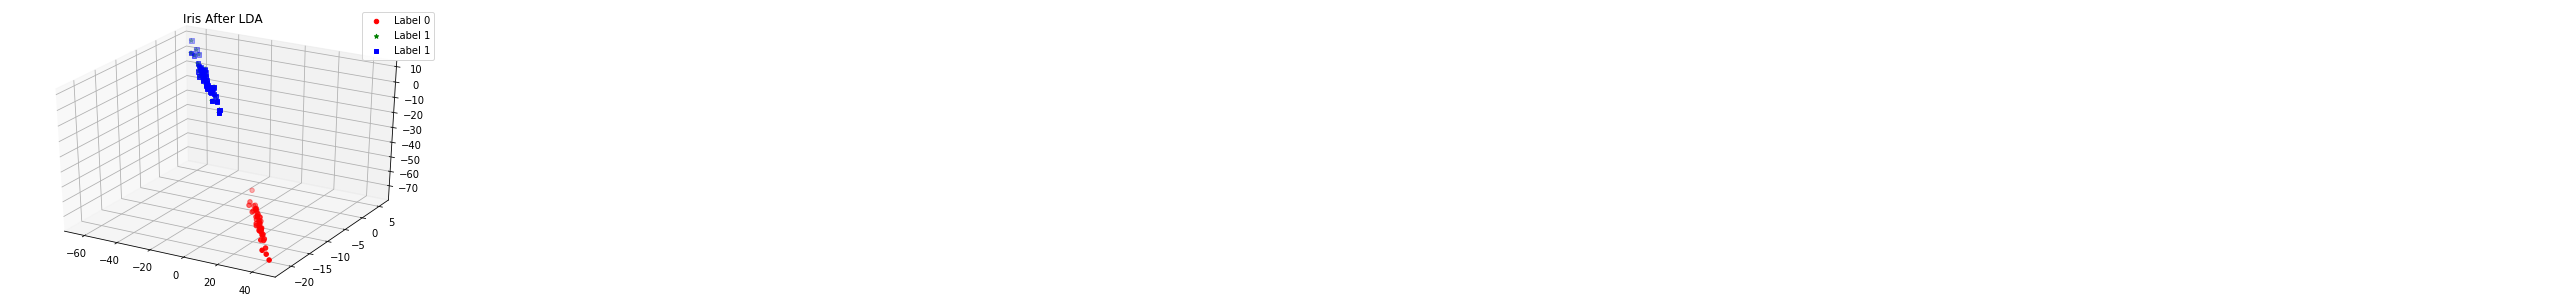

In [41]:
def plot_LDA(converted_X, y):
    """
    原始数据集经过线性判别分析之后数据集的情况
    """
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure()
    ax = Axes3D(fig)
    colors = 'rgb'
    markers = 'o*s'
    for target, color, marker in zip([0, 1, 1], colors, markers):
        pos = (y == target).ravel()
        X = converted_X[pos, :]
        ax.scatter(X[:, 0], X[:, 1], X[:, 2], color=color, marker=marker, label="Label %d"%target)
    ax.legend(loc='best')
    fig.suptitle('Iris After LDA')
    plt.show()
    
X_train, X_test, y_train, y_test = load_iris_data()
X = np.vstack((X_train, X_test))
Y = np.vstack((y_train.reshape(y_train.size, 1), y_test.reshape(y_test.size, 1)))
lda = discriminant_analysis.LinearDiscriminantAnalysis()
lda.fit(X, Y)
converted_X = np.dot(X, np.transpose(lda.coef_)) + lda.intercept_
plot_LDA(converted_X, Y)

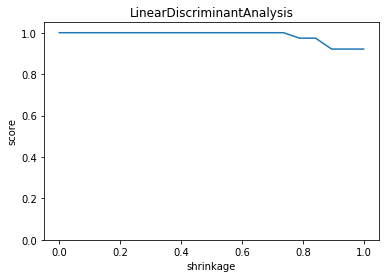

In [42]:
def test_LinearDiscriminantAnalysis_shrinkage(*data):
    """
    在solver=lsqr中引入抖动，即引入正则化项
    """
    X_train, X_test, y_train, y_test = data
    shrinkages = np.linspace(0.0, 1.0, num=20)
    scores = []
    for shrinkage in shrinkages:
        lda = discriminant_analysis.LinearDiscriminantAnalysis(solver='lsqr', shrinkage=shrinkage)
        lda.fit(X_train, y_train)
        scores.append(lda.score(X_test, y_test))
    fig = plt.figure()
    ax =fig.add_subplot(1, 1, 1)
    ax.plot(shrinkages, scores)
    ax.set_xlabel(r'shrinkage')
    ax.set_ylabel(r'score')
    ax.set_ylim(0, 1.05)
    ax.set_title('LinearDiscriminantAnalysis')
    plt.show()
    
X_train, X_test, y_train, y_test = load_iris_data()
test_LinearDiscriminantAnalysis_shrinkage(X_train, X_test, y_train, y_test)

随着shrinkage的增加，模型的预测准确率会随之下降。

In [43]:
(3573.5*2+3500)/3.0

3549.0